Excercise

In [14]:
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.price.describe()

count    13200.000000
mean       112.276178
std        149.175995
min          8.000000
25%         50.000000
50%         71.850000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [9]:
min_threshold,max_threshold=df.price.quantile([0.001,0.999])

Method 01 to get accurate Values

In [10]:
df_no_outliers=df[(df.price>min_threshold)&(df.price<max_threshold)]
df_no_outliers


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Method 2 to get accurate value

In [11]:
df_mean=df.price.mean()
df_std=df.price.std()

In [12]:
upper_boundary=df_mean+4*df_std
lower_boundary=df_mean-4*df_std

In [13]:
df_no_outliers2=df[(df.price>lower_boundary)&(df.price<upper_boundary)]
df_no_outliers2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price', ylabel='Count'>

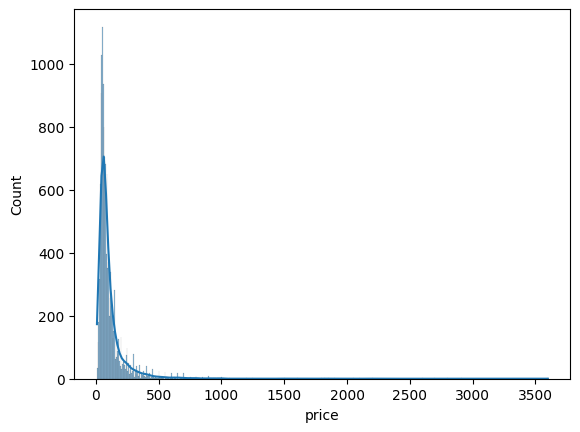

In [18]:
sns.histplot(df.price,kde=True)

Method 3 to get accurate value

In [20]:
df_z=(df.price-df_mean)/df_std

In [21]:
df['ZScore']=df_z

In [23]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.490737
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.051777
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.337026
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.115811
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.410764


In [27]:
df_no_outliers3=df[(df.ZScore>-4) & df.ZScore<4]
df_no_outliers3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.490737
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.051777
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.337026
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.115811
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.410764
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.795864
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.928754
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.350433
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,2.518661
